In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import quandl
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Enter desired start and end dates

In [2]:
start = dt.datetime(2017, 3, 31)
end = dt.datetime.now()
num_months = (end.year - start.year) * 12 + (end.month - start.month)
print('Number of months in range:', num_months)

Number of months in range: 37


## Enter desired tickers

In [3]:
Long_Numerator = "MMM" # Enter whatever stocks you want to view
Short_Denominator = "BA"

## S&P500 

In [4]:
df_SP500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_SP500.rename(columns={'Adj Close': "SP500"}, inplace=True)
df_SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

In [5]:
#Long Stock
df_long = web.DataReader(Long_Numerator, 'yahoo', start, end)
# df_long = df_long[::-1]
df_long.rename(columns={'Adj Close': Long_Numerator}, inplace=True)
df_long.drop(['Close', 'Volume'], 1, inplace=True)
df_long['True_Range'] = df_long['High'] - df_long['Low']

#Short Stock
df_short = web.DataReader(Short_Denominator, 'yahoo', start, end)
# df_short = df_short[::-1]
df_short.rename(columns={'Adj Close': Short_Denominator}, inplace=True)
df_short.drop(['Close', 'Volume'], 1, inplace=True)
df_short['True_Range'] = df_short['High'] - df_short['Low']

### Average True Range

In [6]:
df_long['1d'] = df_long['True_Range']
for i in range(df_long.shape[0] - 1):
    df_long['1d'][i] = (((df_long['True_Range'][i] + df_long['True_Range'][i+1]) / 2) / df_long['Open'][i+1])

df_short['1d'] = df_short['True_Range']
for i in range(df_long.shape[0] - 1):
    df_short['1d'][i] = (((df_short['True_Range'][i] + df_short['True_Range'][i+1]) / 2) / df_short['Open'][i+1])
    
df_long.head(10)

,High,Low,Open,MMM,True_Range,1d
Date,,,,,,
2017-03-31,192.399994,190.990005,191.300003,175.728867,1.409988,0.009460
2017-04-03,192.169998,189.949997,191.869995,175.168625,2.220001,0.008973
2017-04-04,190.979996,189.779999,190.570007,174.681793,1.199997,0.009386
2017-04-05,192.419998,190.039993,190.699997,174.727753,2.380005,0.010241
2017-04-06,191.020004,189.500000,190.410004,174.406296,1.520004,0.006736
2017-04-07,190.559998,189.520004,190.029999,174.498154,1.039993,0.005916
2017-04-10,190.520004,189.309998,190.160004,174.240982,1.210007,0.006107
2017-04-11,190.089996,188.990005,189.130005,174.571625,1.099991,0.005754
2017-04-12,190.490005,189.399994,190.309998,174.231796,1.090012,0.006156


In [7]:
df_short.head(10)

,High,Low,Open,BA,True_Range,1d
Date,,,,,,
2017-03-31,178.179993,176.809998,178.020004,165.385056,1.369995,0.010165
2017-04-03,177.729996,175.500000,177.080002,165.188644,2.229996,0.012042
2017-04-04,178.789993,176.759995,176.880005,167.105667,2.029999,0.014860
2017-04-05,180.179993,176.889999,179.000000,165.590759,3.289993,0.012362
2017-04-06,178.220001,177.119995,177.559998,165.861938,1.100006,0.008212
2017-04-07,179.089996,177.259995,178.389999,167.245926,1.830002,0.012067
2017-04-10,179.970001,177.479996,179.000000,166.039627,2.490005,0.011634
2017-04-11,178.600006,176.960007,177.500000,166.984100,1.639999,0.011080
2017-04-12,178.250000,175.940002,178.250000,164.627594,2.309998,0.010328


In [8]:
ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_long['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_long['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_long['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_long['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_long['1d'][i]
    
print(Long_Numerator, " Average True Range")
print("5d ATR:\t\t", ATR_5d/5)
print("20d ATR:\t", ATR_20d/20)
print("60d ATR:\t", ATR_60d/60)
print("250d ATR:\t", ATR_250d/250)
print("750d ATR:\t", ATR_750d/750, '\n')

ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_short['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_short['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_short['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_short['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_short['1d'][i]
    
print(Short_Denominator, " Average True Range")
print("5d ATR:\t\t", ATR_5d/5)
print("20d ATR:\t", ATR_20d/20)
print("60d ATR:\t", ATR_60d/60)
print("250d ATR:\t", ATR_250d/250)
print("750d ATR:\t", ATR_750d/750)

MMM  Average True Range
5d ATR:		 0.008959181868177924
20d ATR:	 0.00814749864621353
60d ATR:	 0.008306337571436442
250d ATR:	 0.012714929624847564
750d ATR:	 0.01703951342244285 

BA  Average True Range
5d ATR:		 0.011528322757038491
20d ATR:	 0.010998175781001311
60d ATR:	 0.012420217605934312
250d ATR:	 0.017205341609671645
750d ATR:	 0.023360788716217377


In [9]:
df_long.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)
df_short.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)

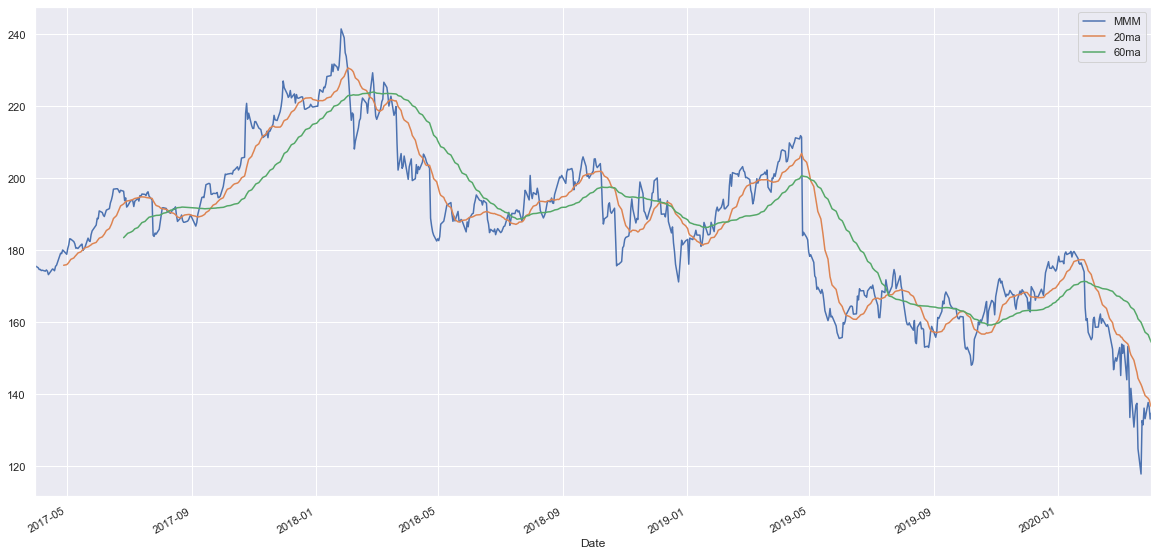

In [10]:
df_long['20ma'] = df_long[Long_Numerator].rolling(window=20).mean()
df_long['60ma'] = df_long[Long_Numerator].rolling(window=60).mean()
df_long.plot(figsize=(20, 10));

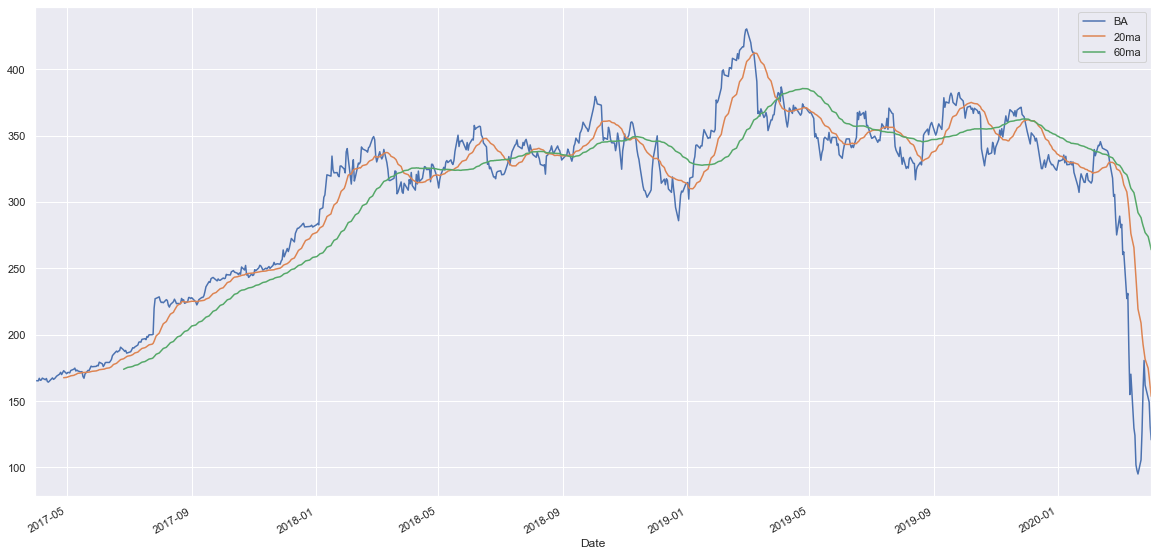

In [11]:
df_short['20ma'] = df_short[Short_Denominator].rolling(window=20).mean()
df_short['60ma'] = df_short[Short_Denominator].rolling(window=60).mean()
df_short.plot(figsize=(20, 10));

### Beta Hedge

In [12]:
df_long.drop(['20ma', '60ma'], 1, inplace=True)
df_short.drop(['20ma', '60ma'], 1, inplace=True)
df_ratio = df_long.merge(df_short, left_on='Date', right_on='Date')

In [13]:
df = df_ratio.merge(df_SP500, left_on='Date', right_on='Date')
df.rename(columns={'SP500': 'SPY'}, inplace=True)

stock_return = df.apply(lambda x: x / x[0])
stock_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end, authtoken="EnterYourTokenHere")
rrf = tbill.iloc[-1, 0]    # Get the most recent Treasury Bill rate
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)

sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()

ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf

beta = smcorr * sy / sx
alpha = ybar - beta * xbar

In [14]:
long_beta = beta[Long_Numerator]
short_beta = beta[Short_Denominator]
print('Long beta (',Long_Numerator,'): ',long_beta) # Note: both betas are calculated based on the dates specified at the top
print('Short beta (',Short_Denominator,'):',short_beta)

Long beta ( MMM ):  0.9104749071154806
Short beta ( BA ): 1.4985478739854163


In [15]:
df_ratio['Ratio'] = (df_ratio[Long_Numerator] / long_beta) / (df_ratio[Short_Denominator] / short_beta)
df_ratio.drop([Long_Numerator, Short_Denominator], 1, inplace=True)

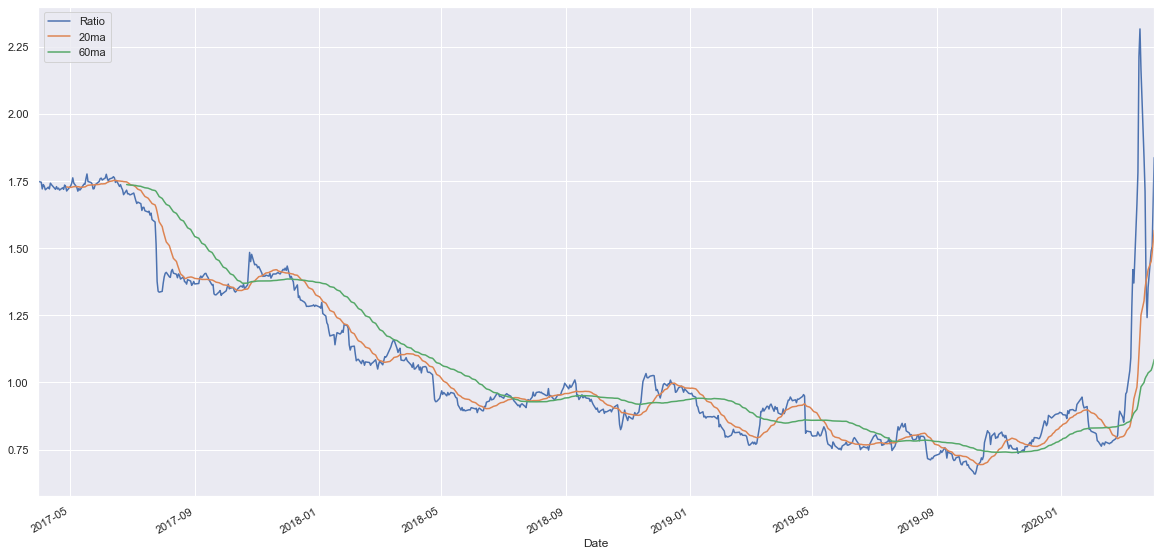

In [16]:
df_ratio['20ma'] = df_ratio['Ratio'].rolling(window=20).mean()
df_ratio['60ma'] = df_ratio['Ratio'].rolling(window=60).mean()

df_ratio.plot(figsize=(20, 10));